In [126]:
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [211]:
cd democracy/

/Users/isabella/Documents/GitHub/democracy


In [228]:
def plot_comp_sub_change(country_name, smooth_year=10):
    
    # read and clean dataframes
    df = pd.read_csv('comsub/{}_comsub.csv'.format(country_name))
    df.rename(columns={'Unnamed: 0': "year"}, inplace=True)
    if country_name == 'french' or country_name == 'chinese':
        df['year'] = df['year'].apply(lambda x: str(x)[:-3])
    df['year'] = df['year'].astype('int')
    df = df.set_index('year')
    df = df.sort_values(by='year')
    
    change_by_year = [0]
    prev = None
    for i, row in df.iterrows():
        if i == df.index[0]:
            prev_c = set(row['complements'])
            prev_s = set(row['substitutes'])
        else:
            comp = set(row['complements'])
            sub = set(row['substitutes'])
            change_c = len(prev_c.symmetric_difference(comp))
            change_s = len(prev_s.symmetric_difference(sub))
            change_total = change_c + change_s
            change_by_year.append(change_total)

            # update prevs
            prev_c = comp
            prev_s = sub
    
    smooth = pd.DataFrame({'year': df.index, 'counts': change_by_year})
    smooth['counts'] = smooth.counts.rolling(smooth_year).mean()
    g = sns.lineplot(data=smooth, x='year', y='counts')
    g.set_title('{}: Counts of Word Change in Complements and Substitutes to Democracy'.format(country_name));

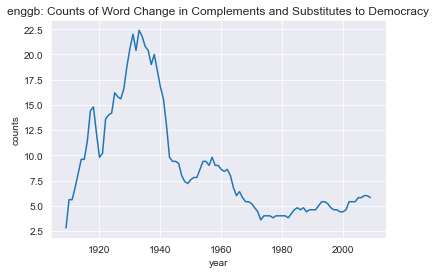

In [160]:
plot_comp_sub_change('enggb', 10)

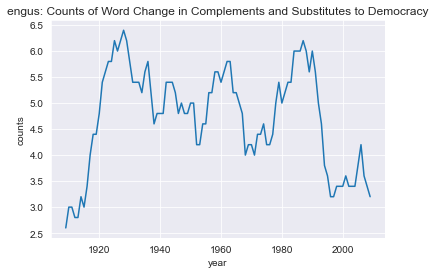

In [163]:
plot_comp_sub_change('engus', 10)

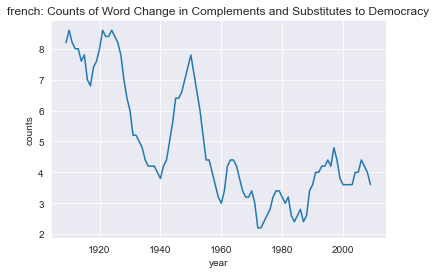

In [159]:
plot_comp_sub_change('french', 10)

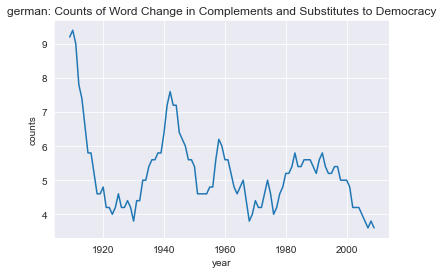

In [144]:
plot_comp_sub_change('german', 10)

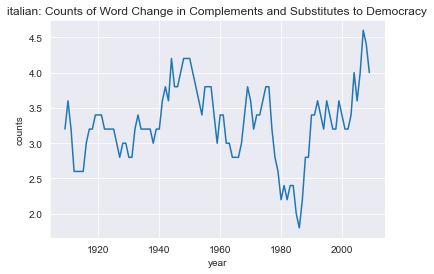

In [165]:
plot_comp_sub_change('italian', 10)

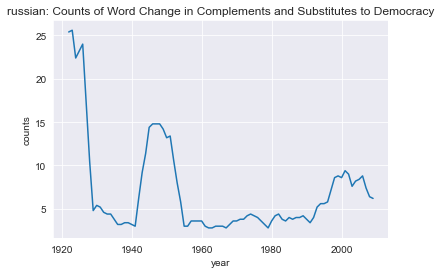

In [166]:
plot_comp_sub_change('russian', 10)

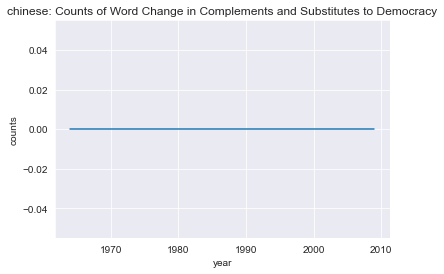

In [229]:
plot_comp_sub_change('chinese', 10)

In [234]:
def analyze_divergence(country_name, smooth_year=10):
    
    # read and clean dataframes
    df = pd.read_csv('comsub/{}_comsub.csv'.format(country_name))
    df.rename(columns={'Unnamed: 0': "year"}, inplace=True)
    if country_name == 'french' or country_name == 'chinese':
        df['year'] = df['year'].apply(lambda x: str(x)[:-3])
    df['year'] = df['year'].astype('int')
    df = df.set_index('year')
    df = df.sort_values(by='year')
    
    
    prev = {}
    divergence_lst = []
    for i, row in df.iterrows():
        dic = ast.literal_eval(row['frequency_dict'])
        total = 0
        for k, v in dic.items():
            if country_name != 'french' and country_name != 'chinese':
                total += v[1]
            else:
                total += v

        if i == df.index[0]:
            if country_name != 'french' and country_name != 'chinese':
                current = {k: v[1] /total for k, v in dic.items()}
            else:
                current = {k: v /total for k, v in dic.items()}

        if i != df.index[0]:
            prev = current
            if country_name != 'french' and country_name != 'chinese':
                current = {k: v[1] /total for k, v in dic.items()}
            else:
                current = {k: v /total for k, v in dic.items()}

        if not prev or not current:
            overlapWords = set()
        else:
            overlapWords = set(prev.keys()) & set(current.keys())

        overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
        prev_lst = []
        current_lst = []
        for word in overlapWords:
            prev_lst.append(prev[word])
            current_lst.append(current[word])

        Divergence = stats.entropy(np.array(prev_lst), np.array(current_lst))
        divergence_lst.append(Divergence)
        
    smooth = pd.DataFrame({'year': df.index, 'divergence': divergence_lst})
    smooth['divergence'] = smooth.divergence.rolling(smooth_year).mean()
    g = sns.lineplot(data=smooth, x='year', y='divergence')
    g.set_title('{}: KL Divergence in Word Distribution of Most Similar Words to Democracy'.format(country_name));

In [195]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

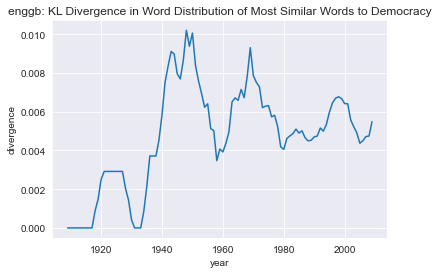

In [196]:
analyze_divergence('enggb')

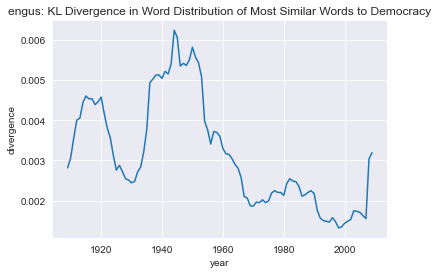

In [192]:
analyze_divergence('engus')

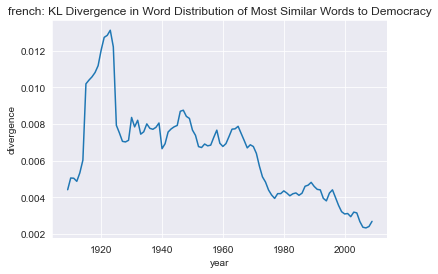

In [197]:
analyze_divergence('french')

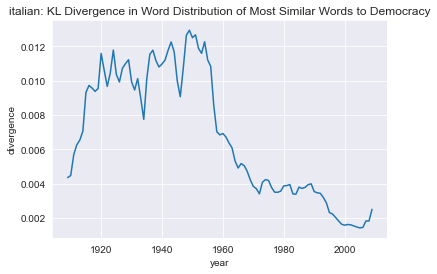

In [198]:
analyze_divergence('italian')

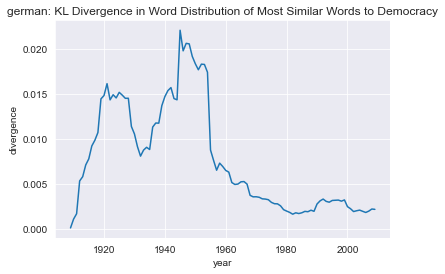

In [199]:
analyze_divergence('german')

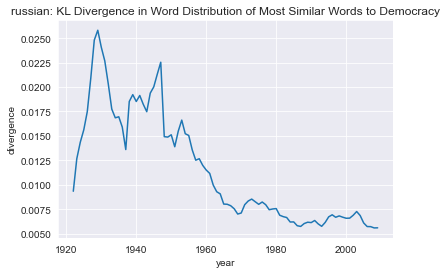

In [200]:
analyze_divergence('russian')

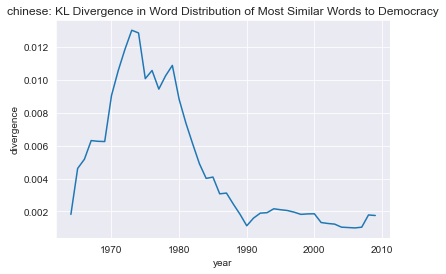

In [235]:
analyze_divergence('chinese')

In [84]:
def sort_dict(dic):
    return sorted(dic.items(), key=lambda x: x[1], reverse=True)

In [87]:
def get_lsts(df_column):
    """
    Get a list of lists of words
    """
    lsts = []
    for n in df.index:
        lst = [w for w, freq in sort_dict(ast.literal_eval(df_column[n]))]
        lsts.append(lst)
        
    return lsts

In [237]:
def get_dataframes(country_name):
    df = pd.read_csv('comsub/{}_comsub.csv'.format(country_name))
    df.rename(columns={'Unnamed: 0': "year"}, inplace=True)
    if country_name == 'french' or country_name == 'chinese':
        df['year'] = df['year'].apply(lambda x: str(x)[:-3])
    df['year'] = df['year'].astype('int')
    df = df.set_index('year')
    df = df.sort_values(by='year')
    
    return df

In [239]:
df = get_dataframes('german')

In [240]:
freqs = get_lsts(df['frequency_dict'])

In [241]:
# words most simliar to democracy by sorted frequency
for i, freq in enumerate(freqs):
    if i % 10 == 0:    
        year = 1900 + i
        print(year, freq, '\n')

1900 ['sozialdemokratie', 'wirtschaft', 'sogen', 'sozialismus', 'sogenannten', 'kunst', 'christentums', 'muttersprache'] 

1910 ['zivilisation', 'weltanschauung', 'religion', 'arbeiterbewegung', 'ethik', 'kapitalismus', 'sogen', 'protestantismus', 'judentums', 'rasse', 'renaissance', 'politik', 'sozialismus', 'ideen', 'einzelstaaten', 'wirtschaft', 'proletariats', 'tradition', 'erkenntnistheorie', 'republik'] 

1920 ['liberalismus', 'antiken', 'sozialismus', 'kapitalismus', 'proletariats', 'bourgeoisie', 'kommunismus', 'arbeiterbewegung', 'zivilisation', 'revolution', 'diktatur', 'gesellschaftsordnung', 'arbeiterklasse', 'republik', 'revolutionären', 'demokratischen', 'imperialismus', 'proletarischen', 'wirtschaft', 'weltanschauung', 'welt', 'landschaft', 'sozialdemokratie', 'soziologie', 'idee', 'judentums', 'kultur', 'sittlichkeit', 'modernen', 'propaganda', 'tradition', 'nation', 'ideen', 'demokratische', 'wissenschaft', 'religion', 'staat', 'gesellschaft', 'juden', 'judentum', 'mar

In [242]:
for i, comp in enumerate(df['complements']):
    if i % 10 == 0:    
        year = 1900 + i
        print(year, comp, '\n')

1900 ['wirtschaft', 'muttersprache', 'sogen', 'sozialdemokratie', 'christentums', 'sozialismus', 'sogenannten', 'kunst'] 

1910 ['sozialismus', 'judentums', 'wirtschaft', 'politik', 'proletariats', 'ethik', 'tradition', 'religion', 'zivilisation', 'erkenntnistheorie', 'arbeiterbewegung', 'weltanschauung', 'kapitalismus', 'republik', 'ideen', 'sogen', 'einzelstaaten', 'renaissance', 'protestantismus', 'rasse'] 

1920 ['liberalismus', 'sittlichkeit', 'fortschritts', 'tradition', 'kampfes', 'arbeiterklasse', 'nation', 'ideen', 'beherrschung', 'proletariats', 'sozialdemokratie', 'propaganda', 'sozialismus', 'idee', 'ordnung', 'juden', 'modernen', 'gesellschaftsordnung', 'demokratische', 'kapitalismus', 'gewährleisten', 'staat', 'reformation', 'ethik', 'zivilisation', 'wissenschaft', 'antiken', 'judentums', 'bewegung', 'partei', 'wirtschaft', 'revolution', 'kultur', 'soziologie', 'landschaft', 'bourgeoisie', 'kommunismus', 'religion', 'republik', 'konstruktion', 'gerechtigkeit', 'imperialis

In [243]:
for i, sub in enumerate(df['substitutes']):
    if i % 10 == 0:    
        year = 1900 + i
        print(year, sub, '\n')

1900 ['kunst', 'sogenannten', 'sozialismus', 'christentums', 'sozialdemokratie', 'sogen', 'muttersprache', 'wirtschaft'] 

1910 ['rasse', 'protestantismus', 'renaissance', 'einzelstaaten', 'sogen', 'ideen', 'republik', 'kapitalismus', 'weltanschauung', 'arbeiterbewegung', 'erkenntnistheorie', 'zivilisation', 'religion', 'tradition', 'ethik', 'proletariats', 'politik', 'wirtschaft', 'judentums', 'sozialismus'] 

1920 ['diktatur', 'arbeiterbewegung', 'demokratischen', 'revolutionären', 'weltanschauung', 'welt', 'gesellschaft', 'proletarischen', 'umwelt', 'marxismus', 'liberalen', 'judentum', 'imperialismus', 'gerechtigkeit', 'konstruktion', 'republik', 'religion', 'kommunismus', 'bourgeoisie', 'landschaft', 'soziologie', 'kultur', 'revolution', 'wirtschaft', 'partei', 'judentums', 'bewegung', 'antiken', 'zivilisation', 'wissenschaft', 'ethik', 'reformation', 'staat', 'gewährleisten', 'kapitalismus', 'demokratische', 'gesellschaftsordnung', 'modernen', 'juden', 'ordnung', 'idee', 'soziali

In [98]:
df['context_dict'][1980]

"{'personality': -0.842, 'leadership': 0.092, 'medicine': 0.736, 'organisation': -0.686, 'capitalism': 0.756, 'psychology': -0.222, 'perception': -0.05, 'politics': 0.138, 'symbol': 0.552, 'liberation': -0.054, 'organization': -0.738, 'psychological': -0.087, 'evolution': 0.943, 'mankind': 0.229, 'agriculture': 0.294, 'transformation': -0.071, 'administrative': -0.454, 'reform': 0.108, 'universe': 0.082}"